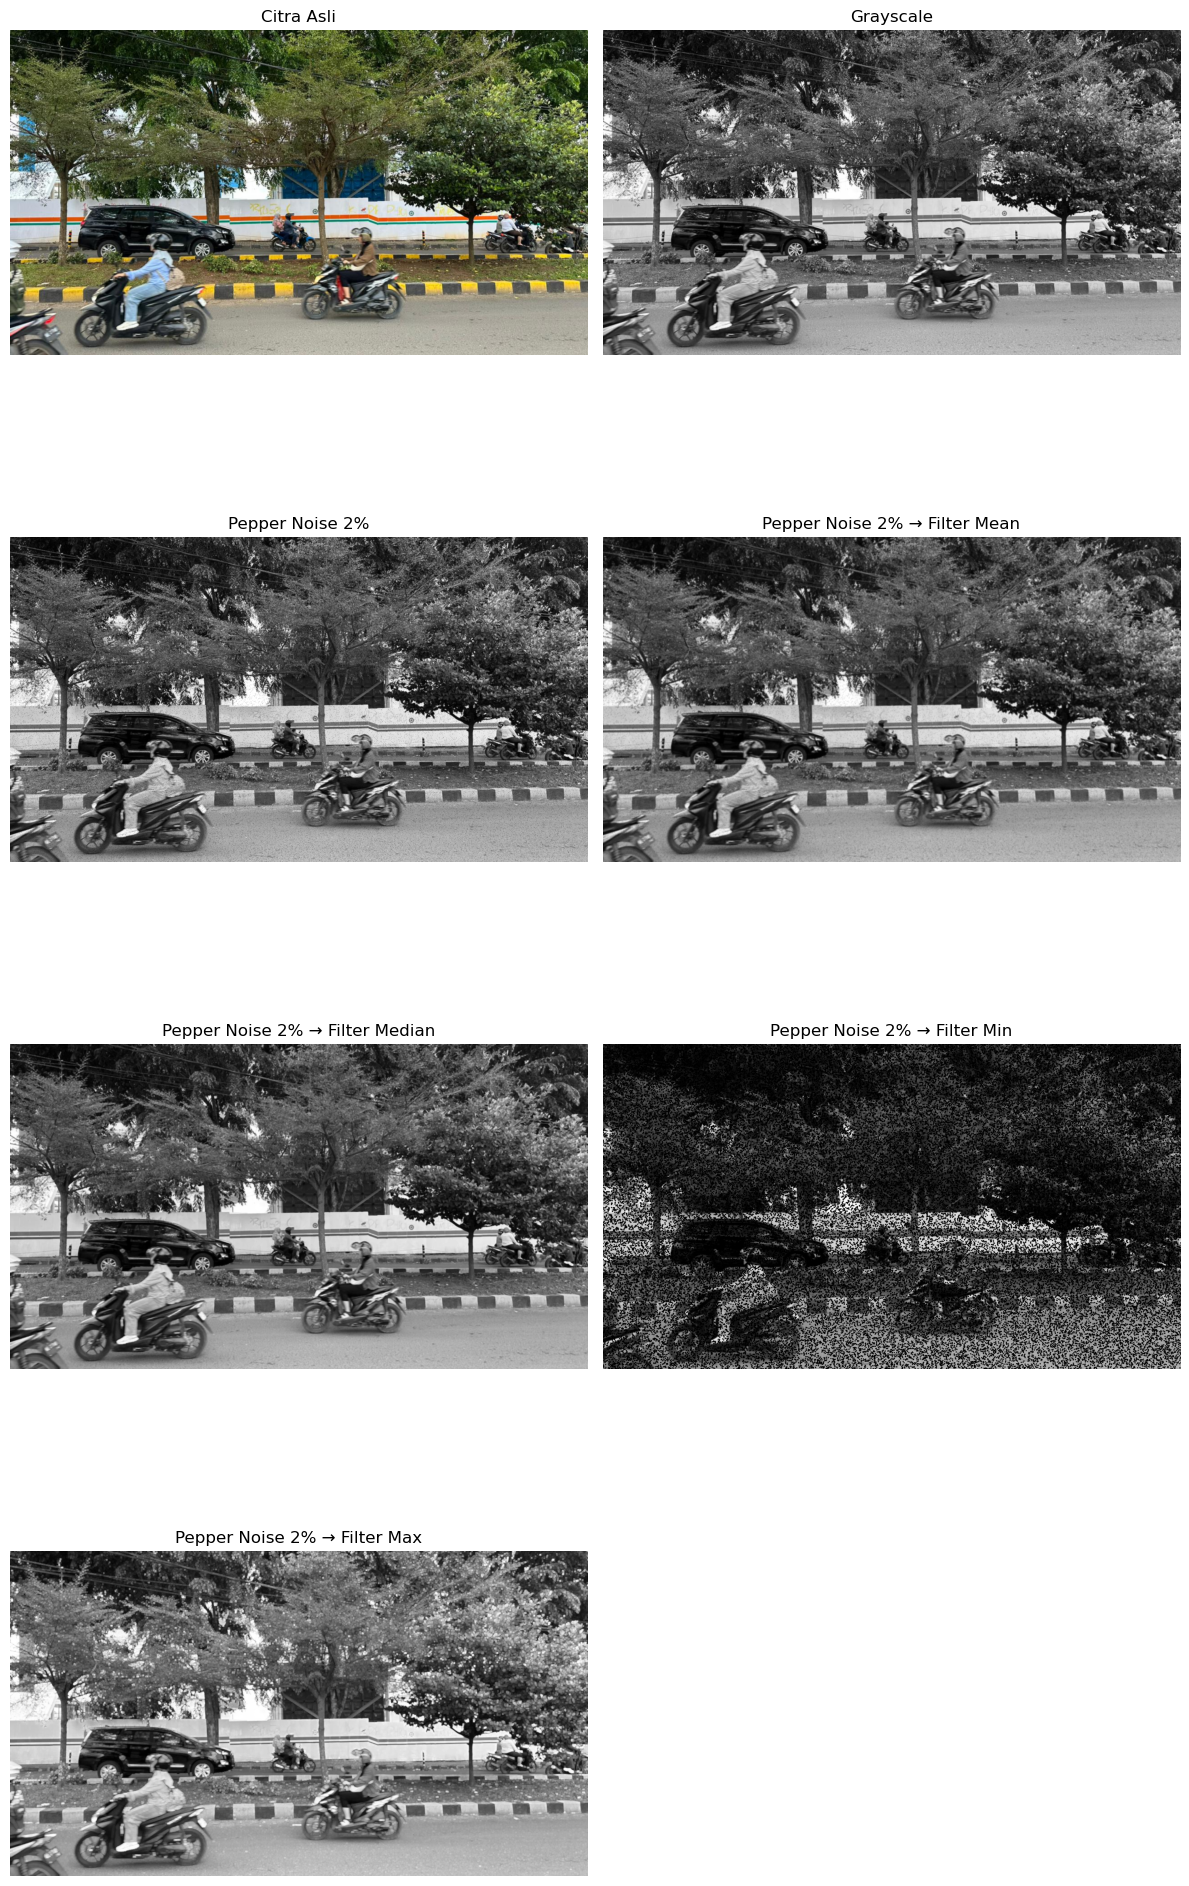

Selesai!


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ===== INPUT CITRA =====
img = cv2.imread('jalan.jpg')

if img is None:
    print("Error: Gambar tidak ditemukan! Pastikan path file benar.")
else:
    img = cv2.resize(img, (img.shape[1] * 2, img.shape[0] * 2))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # ===== KONVERSI KE GRAYSCALE =====
    height, width, _ = img_rgb.shape
    gray = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            R = img_rgb[i, j, 0]
            G = img_rgb[i, j, 1]
            B = img_rgb[i, j, 2]
            gray[i, j] = int(0.299 * R + 0.587 * G + 0.114 * B)

    # ===== PENAMBAHAN PEPPER NOISE 2% =====
    amount_pepper = 0.02
    gray_pepper = gray.copy()

    for i in range(height):
        for j in range(width):
            if np.random.rand() < amount_pepper:
                gray_pepper[i, j] = 0  # Pepper (hitam)

    # ===== FILTER MANUAL 5x5 =====
    def manual_mean_filter(img, kernel_size=5):
        h, w = img.shape
        k = kernel_size // 2
        padded = cv2.copyMakeBorder(img, k, k, k, k, cv2.BORDER_REPLICATE)
        result = np.zeros((h, w), dtype=np.uint8)

        for i in range(h):
            for j in range(w):
                result[i, j] = int(np.mean(padded[i:i+kernel_size, j:j+kernel_size]))
        return result

    def manual_median_filter(img, kernel_size=5):
        h, w = img.shape
        k = kernel_size // 2
        padded = cv2.copyMakeBorder(img, k, k, k, k, cv2.BORDER_REPLICATE)
        result = np.zeros((h, w), dtype=np.uint8)

        for i in range(h):
            for j in range(w):
                result[i, j] = np.median(padded[i:i+kernel_size, j:j+kernel_size])
        return result

    def manual_min_filter(img, kernel_size=5):
        h, w = img.shape
        k = kernel_size // 2
        padded = cv2.copyMakeBorder(img, k, k, k, k, cv2.BORDER_REPLICATE)
        result = np.zeros((h, w), dtype=np.uint8)

        for i in range(h):
            for j in range(w):
                result[i, j] = padded[i:i+kernel_size, j:j+kernel_size].min()
        return result

    def manual_max_filter(img, kernel_size=5):
        h, w = img.shape
        k = kernel_size // 2
        padded = cv2.copyMakeBorder(img, k, k, k, k, cv2.BORDER_REPLICATE)
        result = np.zeros((h, w), dtype=np.uint8)

        for i in range(h):
            for j in range(w):
                result[i, j] = padded[i:i+kernel_size, j:j+kernel_size].max()
        return result

    # ===== PROSES FILTERING =====
    mean_result = manual_mean_filter(gray_pepper)
    median_result = manual_median_filter(gray_pepper)
    min_result = manual_min_filter(gray_pepper)
    max_result = manual_max_filter(gray_pepper)

    # ===== TAMPILAN HASIL =====
    plt.figure(figsize=(12, 21))

    plt.subplot(4, 2, 1)
    plt.title("Citra Asli")
    plt.imshow(img_rgb)
    plt.axis("off")

    plt.subplot(4, 2, 2)
    plt.title("Grayscale")
    plt.imshow(gray, cmap='gray')
    plt.axis("off")

    plt.subplot(4, 2, 3)
    plt.title("Pepper Noise 2%")
    plt.imshow(gray_pepper, cmap='gray')
    plt.axis("off")

    plt.subplot(4, 2, 4)
    plt.title("Pepper Noise 2% → Filter Mean")
    plt.imshow(mean_result, cmap='gray')
    plt.axis("off")

    plt.subplot(4, 2, 5)
    plt.title("Pepper Noise 2% → Filter Median")
    plt.imshow(median_result, cmap='gray')
    plt.axis("off")

    plt.subplot(4, 2, 6)
    plt.title("Pepper Noise 2% → Filter Min")
    plt.imshow(min_result, cmap='gray')
    plt.axis("off")

    plt.subplot(4, 2, 7)
    plt.title("Pepper Noise 2% → Filter Max")
    plt.imshow(max_result, cmap='gray')
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    print("Selesai!")